In [7]:
# !pip install pmdarima

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
file="..\\data\\data_pret\\capitalisation.csv"
df=pd.read_csv(file)
#################################################
y=np.array(df["capitalisation"])

<h1>description des données :</h1>

dessin de l'évolution des données:

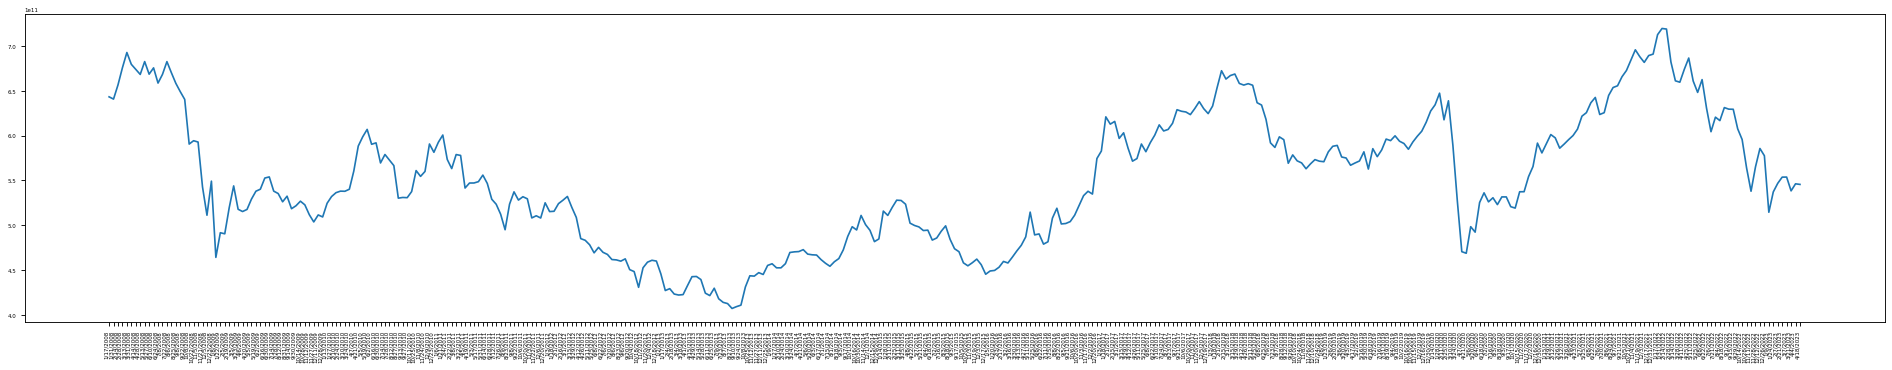

In [154]:
dd=[]
dp=[]
for d in range(len(df["date"])):
    if (d+1)%10==0:
        dd.append(str(df["date"][d]))
        dp.append(df["capitalisation"][d])

from matplotlib.pyplot import figure
fig = plt.figure(figsize=(30, 5), dpi=80)
ax = plt.subplot(111)
# figure(figsize=(30, 5), dpi=80)
plt.rcParams.update({'font.size': 7})
plt.xticks(rotation=90, ha='right')
ax.plot(dd,dp,color='C0')
fig.savefig('capitalisation.png')
plt.show()

maximum minimum et moyenne des données :

In [161]:
d={
    "max" : float(np.max(y)),
    "date_max" : df["date"][np.argmax(y)],
    "min" : float(np.min(y)),
    "date_min" : df["date"][np.argmin(y)],
    "moyenne"  : float(np.mean(y)),
    "std"      :  float(np.std(y)) 
}
import json
print(json.dumps(d,indent=2))

{
  "max": 725730000000.0,
  "date_max": "2/10/2022",
  "min": 403894000000.0,
  "date_min": "8/29/2013",
  "moyenne": 550695678459.1195,
  "std": 72256692941.77304
}


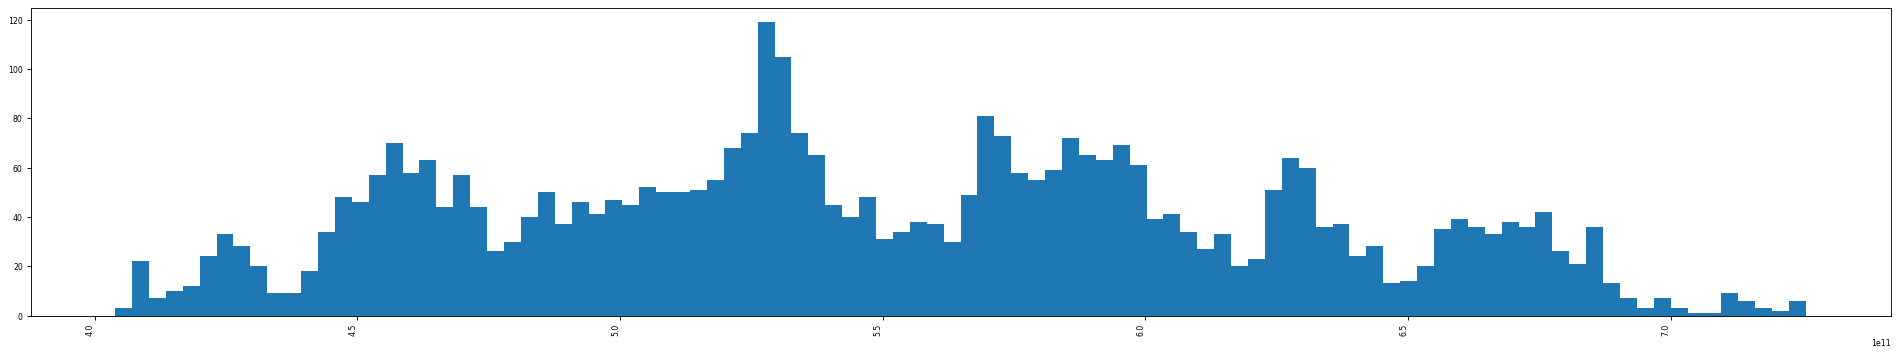

In [159]:
from matplotlib.pyplot import figure
fig = plt.figure(figsize=(30, 5), dpi=80)
ax = plt.subplot(111)
# figure(figsize=(30, 5), dpi=80)
plt.rcParams.update({'font.size': 7})
plt.xticks(rotation=90, ha='right')
ax.hist(y,color='C0',bins=100)
fig.savefig('dist_cap.png')
plt.show()

<h2>les outils mathématiques en usage :</h2>

${\displaystyle \operatorname {REQM} ={\sqrt {\frac {\sum _{t=1}^{T}({\hat {y}}_{t}-y_{t})^{2}}{T}}}.}$<br>
${\displaystyle \operatorname {MSE} ={\frac {1}{n}}\sum _{i=1}^{n}\left(Y_{i}-{\hat {Y_{i}}}\right)^{2}.}$<br>

$\Delta y_t = \alpha + \beta t + \gamma y_{t-1} + \delta_1 \Delta y_{t-1} + \cdots + \delta_{p-1} \Delta y_{t-p+1} + \varepsilon_t$

${\displaystyle \mathrm {DF} _{\tau }={\frac {\hat {\gamma }}{\operatorname {SE} ({\hat {\gamma }})}}}$

In [41]:
def adfuler_test(variable):
    result = adfuller(variable)
    print('ADF Statistic  : %f' % result[0])
    print('p-value        : %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        
def rmse(yr,yp):
    return np.linalg.norm(yr-yp)/np.sqrt(len(yr))

def corr(a,b):
    return np.corrcoef(a,b)

def fifo(liste,v):
    li=list(liste)
    li.append(v)
    li.pop(0)
    return li

<h1 style="color: #ff0000">vérification de la stationarité</h1>

on ne peut rejeter l'hypothèse null parceque la p-value du test Adfuler ne tombe pas au dessous du seuil 0.05

In [3]:
adfuler_test(y)

ADF Statistic  : -2.386612
p-value        : 0.145551
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


agir par différenciation pour rendre la série temporelle stationnaire.<br>
ainsi au lieu de prédir $y_{i}$ on prédit $y_{i}-y_{i-1}$ 

In [4]:
yp=np.array([ (y[i]-y[i-1])  for i in range(1,len(y))  ])
adfuler_test(yp)

ADF Statistic  : -13.972115
p-value        : 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


ainsi les prévisions porteront sur $yp=y_{i}-y_{i-1}$<br>
et $y_{i}=yp-y_{i-1}$

<h1 style="color: #ff0000">Normalisation de la série temporelle</h1>

<b>normalisation de la série temporelle:</b><br>
$$ypn=\frac{ Yp-min(Yp) }{max(Yp)-min(Yp)}$$

--------------------
min=-49809000000.0
max=29391000000.0
std=4031279810.315742
moy=-14406028.83355177
--------------------
--------------------
min=0.0
max=1.0
std=0.05089999760499675
moy=0.6287196208480613
--------------------


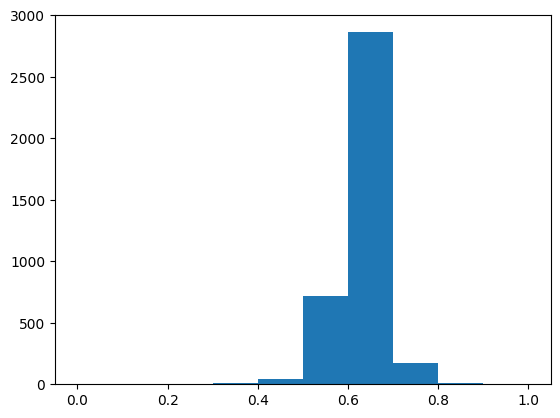

In [5]:
ypn=(yp-np.min(yp))/(np.max(yp)-np.min(yp))
print("-"*20)
print("min={}".format(np.min(yp)))
print("max={}".format(np.max(yp)))
print("std={}".format(np.std(yp)))
print("moy={}".format(np.mean(yp)))
print("-"*20)
print("-"*20)
print("min={}".format(np.min(ypn)))
print("max={}".format(np.max(ypn)))
print("std={}".format(np.std(ypn)))
print("moy={}".format(np.mean(ypn)))
print("-"*20)
plt.hist(ypn)
plt.show()

traitement des valeurs abérantes:<br>
si valeur> 5 ou valeur <-5 faire valeur=5 ou valeur=-5

<h1 style="color: #ff0000"> discrétisation de la série temporelle :</h1>

la fonction de discrétisation est :
$f(x)=$

In [6]:
# ypd=list(ypnc)
# s=5
# d=int(20/2)
# for i in range(len(ypnc)):
#     for j in range(-d,d+1):
#         if ypn[i]<=(s*j/(d*2)):
#             ypd[i]=s*j/(d*2)
#             break

In [7]:
# o=plt.hist(ypd,bins=100)

la discrétisation de la série temporelle a été entreprise pour y entrainer un arbre de décision.<br>
toutefois, il a été remarqué que l'arbre de décision n'arrive pas à généraliser quoi que ce soit les transformations ni les dimensions d'entrée

<h1 style="color: #ff0000">modélisation ARIMA :</h1>

In [8]:
from pmdarima import auto_arima

il est à noter que le paramètre d'optimisation utilisé pour optimiser les paramètres est :<br>
${\displaystyle \mathrm {AIC} \,=\,2k-2\ln({\hat {L}})}$<br>

${\displaystyle {\mathcal {L}}(\mu _{1},\sigma _{1},\mu _{2},\sigma _{2})\,=\,}$

${\displaystyle \;\;\;\;\;\;\;\;\prod _{i=1}^{n_{1}}{\frac {1}{{\sqrt {2\pi }}\sigma _{1}}}\exp \left(-{\frac {(x_{i}-\mu _{1})^{2}}{2\sigma _{1}^{2}}}\right)\;\,{\boldsymbol {\cdot }}\,\prod _{i=n_{1}+1}^{n_{1}+n_{2}}{\frac {1}{{\sqrt {2\pi }}\sigma _{2}}}\exp \left(-{\frac {(x_{i}-\mu _{2})^{2}}{2\sigma _{2}^{2}}}\right)}$

In [9]:
stepwise_fit = auto_arima(ypn, start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # on ne veut pas savoir si un ordre ne marche pas
                          suppress_warnings = True,  # on ne veut pas voir les alertes de convergence
                          stepwise = True) 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=46.45 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-9397.691, Time=2.18 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-10508.774, Time=11.69 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=27.04 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-9399.686, Time=0.62 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-9514.419, Time=0.85 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-10852.563, Time=43.54 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=82.75 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=27.85 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=-10702.301, Time=22.37 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=-10850.749, Time=46.91 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=-10850.699, Time=64.71 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=-10843.604, Time=55.05 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=-10848.954, Time=44.29 sec
 ARIMA(1,0,

In [10]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 3815
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood                5431.271
Date:                            Sat, 20 May 2023   AIC                         -10854.541
Time:                                    09:48:27   BIC                         -10829.567
Sample:                                         0   HQIC                        -10845.666
                                           - 3815                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1983      0.009     22.827      0.000       0.181       0.215
ar.S.L12      -0.6234      0.009    -70.906      0.000      -0.641      -0.606
ar.S.L24      -0.2957      0.009    -32.263      0.000      -0.314      -0.278
sigma2         0.0034   2.93e-05    114.638      0.000       0.003       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             22890.60
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                            -0.71
Prob(H) (two-sided):                  0.12   Kurtosis:                        14.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
train_arima= ypn[:len(ypn)-12]
test_arima = ypn[len(ypn)-12:]
  
# entrainer un SARIMAX(1, 0, 0)x(2, 1, 0, 12) sur les données d'entrainnement
#il s'agit des meilleures paramètres retrouvés lors de la recherche

from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sarimax = SARIMAX(train_arima, order = (1, 0, 0), seasonal_order =(2, 1, 0, 12))
result = model_sarimax.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 3803
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood                5410.269
Date:                            Sat, 20 May 2023   AIC                         -10812.538
Time:                                    09:48:34   BIC                         -10787.577
Sample:                                         0   HQIC                        -10803.666
                                           - 3803                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1989      0.009     22.856      0.000       0.182       0.216
ar.S.L12      -0.6239      0.009    -70.788      0.000      -0.641      -0.607
ar.S.L24      -0.2957      0.009    -32.180      0.000      -0.314      -0.278
sigma2         0.0034   2.94e-05    114.399      0.000       0.003       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             22759.74
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                            -0.71
Prob(H) (two-sided):                  0.12   Kurtosis:                        14.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<h3 style="color:#252525">forecasting avec le modèle ARIMA:</h3>

In [53]:
def prevision_arima(cap, ordre,seasonal_ordre, size):
    start = len(cap)
    end = start+size -1
    train_arima=np.array([ cap[t]-cap[t-1]  for t in range(1,len(cap))])
    model_sarimax = SARIMAX(train_arima, order = ordre, seasonal_order =seasonal_ordre)
    model_arima = model_sarimax.fit()
    predictions = model_arima.predict(start, end,typ = 'levels')
    pre=[cap[-1]]
    i=1
    for e in predictions:
        pre.append(pre[i-1]+e)
        i+=1
    return np.array(pre[1:])

C:\Users\Fujitsu\Desktop\article_1\venv\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


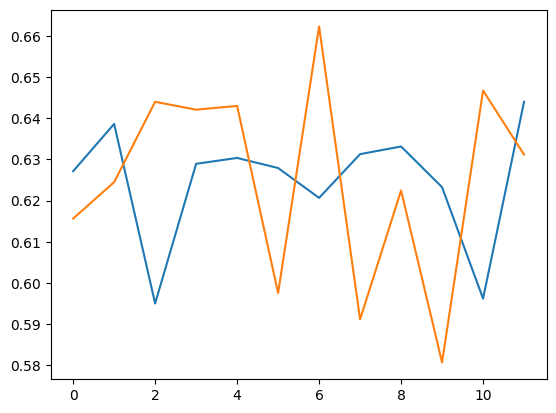

In [12]:
start = len(train_arima)
end = len(train_arima) +12 -1
# Predictions for one-year against the test set
predictions = result.predict(start, end,typ = 'levels')
plt.plot(test_arima[:13])
plt.plot(predictions)

In [13]:
rmse_=rmse(np.array(test_arima[:13]), np.array(predictions))
mse_=mean_squared_error(np.array(test_arima[:13]),np.array( predictions))
print("rmse={}".format(rmse_))
print("mse={}".format(mse_))

rmse=0.031572461894484205
mse=0.000996820350078657


C:\Users\Fujitsu\Desktop\article_1\venv\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


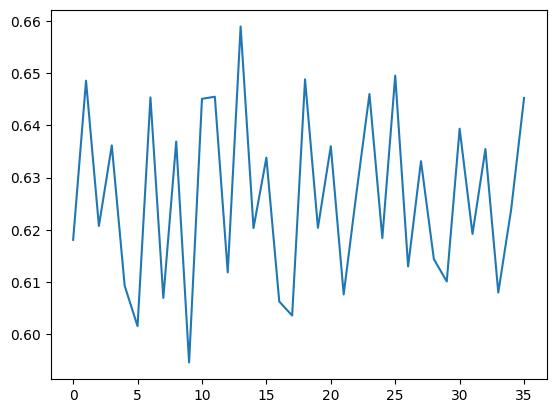

In [14]:
# Train the model on the full dataset
model_sarimax = SARIMAX(ypn,order = (1, 0, 0),seasonal_order =(2, 1, 0, 12))
result = model_sarimax.fit()
forecast = result.predict(start = len(ypn),end = (len(ypn)-1) + 3 * 12,typ = 'levels')
plt.plot(forecast)

<h1>modélisation LSTM :</h1>

In [15]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

pour utiliser les LSTM il n'est pas nécessaire de rendre les données stationnaires<br>
toutefois, il est fortement recommmandé d'avoir les données entre 0 et 1<br>
pour ce faire on procède par normalisation des données brutes comme déjà utilisé

In [27]:
yn=(y-np.min(y))/(np.max(y)-np.min(y))
print("min_y=",np.min(y))
print("max_y=",np.max(y))

min_y= 403894000000.0
max_y= 725730000000.0


In [65]:
fenetre=12
train_size=3800
test_size=len(ypn)-train_size

train = yn[0:train_size]
train = np.array(train)
x_train, y_train = [], []
for i in range(len(train)-fenetre):
    x_train.append(train[i:i+fenetre])
    y_train.append(train[i+fenetre])
x_train = np.array(x_train)
y_train = np.array(y_train)

test = yn[train_size:]
test = np.array(test)
x_test, y_test = [], []
for i in range(len(test)-fenetre):
    x_test.append(test[i:i+fenetre])
    y_test.append(test[i+fenetre])
x_test = np.array(x_test)
y_test = np.array(y_test)

In [66]:
model_lstm = Sequential()
model_lstm.add(LSTM(units=24, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_lstm.add(LSTM(units=24))
model_lstm.add(Dense(1))
model_lstm.compile( loss='mean_squared_error', optimizer='adam')

In [67]:
model_lstm.fit(x_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
60/60 [==============================] - 6s 16ms/step - loss: 0.0527
Epoch 2/100
60/60 [==============================] - 1s 16ms/step - loss: 0.0018
Epoch 3/100
60/60 [==============================] - 1s 16ms/step - loss: 0.0011
Epoch 4/100
60/60 [==============================] - 1s 15ms/step - loss: 0.0011
Epoch 5/100
60/60 [==============================] - 1s 15ms/step - loss: 0.0011
Epoch 6/100
60/60 [==============================] - 1s 15ms/step - loss: 0.0011
Epoch 7/100
60/60 [==============================] - 1s 16ms/step - loss: 0.0011
Epoch 8/100
60/60 [==============================] - 1s 15ms/step - loss: 0.0011
Epoch 9/100
60/60 [==============================] - 1s 15ms/step - loss: 0.0010
Epoch 10/100
60/60 [==============================] - 1s 15ms/step - loss: 0.0010
Epoch 11/100
60/60 [==============================] - 1s 16ms/step - loss: 0.0010
Epoch 12/100
60/60 [==============================] - 1s 16ms/step - loss: 0.0010
Epoch 13/100
60/60 [=====

60/60 [==============================] - 1s 13ms/step - loss: 1.7145e-04
Epoch 97/100
60/60 [==============================] - 1s 15ms/step - loss: 1.7815e-04
Epoch 98/100
60/60 [==============================] - 1s 15ms/step - loss: 1.7382e-04
Epoch 99/100
60/60 [==============================] - 1s 15ms/step - loss: 1.7084e-04
Epoch 100/100
60/60 [==============================] - 1s 18ms/step - loss: 1.6437e-04


In [68]:
predicted = model_lstm.predict(x_test)

1/1 [==============================] - 1s 1s/step


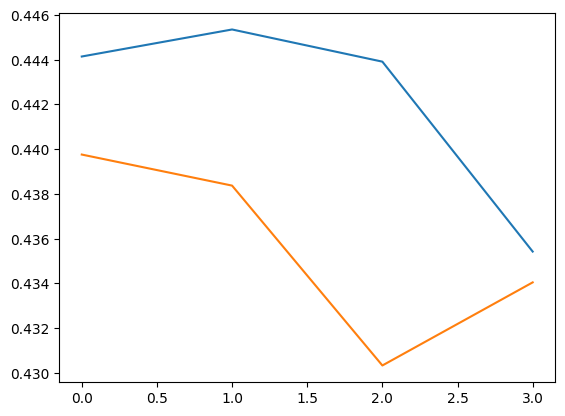

In [69]:
plt.plot(predicted)
plt.plot(y_test)

In [45]:
def prevision_lstm(cap,min_,max_,dim_, model, size):
    xx=(np.array(cap[len(cap)-dim_:len(cap)])-min_)/(max_-min_)
    xx=xx.reshape(1,-1)
    re=[]
    for i in range(size):
        pp=model.predict(xx)[0][0]
        re.append(pp*(max_-min_)+min_)
        xx=np.array(fifo(xx,pp))
        xx=xx.reshape(1,-1)
    return np.array(re)

In [70]:
sz=200
val=np.array(y[len(y)-sz:])
tra=np.array(y[:len(y)-sz])

prev_lstm =prevision_lstm(cap=tra,min_=np.min(y),max_=np.max(y),dim_=12, model=model_lstm, size=sz)
prev_arima=prevision_arima(cap=tra, ordre=(1, 0, 0),seasonal_ordre =(2, 1, 0, 12), size=sz)

1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 32ms/step


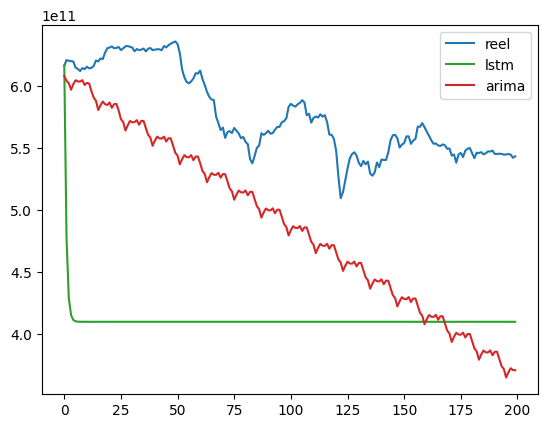

In [71]:
plt.plot(val       , color="C0")
plt.plot(prev_lstm , color="C2")
plt.plot(prev_arima, color="C3")
plt.legend(["reel","lstm","arima"])

In [73]:
rmse_=rmse(val, prev_lstm)
mse_=mean_squared_error(val,prev_lstm)
print("rmse={}".format(rmse_))
print("mse={}".format(mse_))

rmse=169574034394.21906
mse=2.8755353140731778e+22


In [74]:
rmse_=rmse(val, prev_arima)
mse_=mean_squared_error(val,prev_arima)
print("rmse={}".format(rmse_))
print("mse={}".format(mse_))

rmse=99036766097.12567
mse=9.808281038976784e+21


In [22]:
rmse_=rmse(np.array(y_test[-12:]), np.array(predicted[-12:]))
mse_=mean_squared_error(np.array(y_test[-12:]),np.array( predicted[-12:]))
print("rmse={}".format(rmse_))
print("mse={}".format(mse_))

rmse=0.05480395048517098
mse=0.00026286397548879245


<h1>remonter les prévisions et comparer les résultas des modèles:</h1>